In [1]:
import pennylane as qml
import os



In [2]:
cd datasets/

/Users/mk/Desktop/project_course/datasets


In [3]:
codes = []
directory_path = './'
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)

    # Check if the current item is a file (and not a subdirectory)
    if os.path.isfile(file_path):
        try:
            # Open the file in read mode ('r')
            with open(file_path, 'r') as f:
                content = f.read()  # Read the entire content of the file
                codes.append(content)
                # You can perform further processing on 'content' here
        except Exception as e:
            print(f"Error opening or reading {filename}: {e}")


In [4]:
cd ..

/Users/mk/Desktop/project_course


In [5]:
codes[0]

'// Benchmark was created by MQT Bench on 2024-03-18\n// For more information about MQT Bench, please visit https://www.cda.cit.tum.de/mqtbench/\n// MQT Bench version: 1.1.0\n// Qiskit version: 1.0.2\n\nOPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[8];\ncreg meas[8];\nu2(2.0,-pi) q[0];\nu2(2.0,-pi) q[1];\ncx q[0],q[1];\np(9.172838187819544) q[1];\ncx q[0],q[1];\nu2(2.0,-pi) q[2];\ncx q[0],q[2];\np(9.172838187819544) q[2];\ncx q[0],q[2];\ncx q[1],q[2];\np(9.172838187819544) q[2];\ncx q[1],q[2];\nu2(2.0,-pi) q[3];\ncx q[0],q[3];\np(9.172838187819544) q[3];\ncx q[0],q[3];\ncx q[1],q[3];\np(9.172838187819544) q[3];\ncx q[1],q[3];\ncx q[2],q[3];\np(9.172838187819544) q[3];\ncx q[2],q[3];\nu2(2.0,-pi) q[4];\ncx q[0],q[4];\np(9.172838187819544) q[4];\ncx q[0],q[4];\ncx q[1],q[4];\np(9.172838187819544) q[4];\ncx q[1],q[4];\ncx q[2],q[4];\np(9.172838187819544) q[4];\ncx q[2],q[4];\ncx q[3],q[4];\np(9.172838187819544) q[4];\ncx q[3],q[4];\nu2(2.0,-pi) q[5];\ncx q[0],q[5];\np(9.172838187819544) q[

<class 'function'>
<class 'list'>


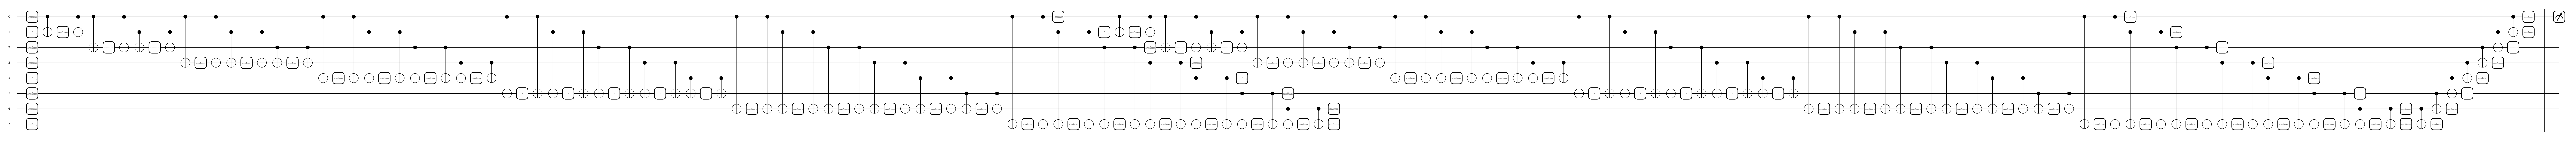

In [8]:
import matplotlib.pyplot as plt

def get_pennylane_gates(code):
    qasm_func = qml.from_qasm(
        code,
        measurements = [qml.var(qml.Y(0))] 
    )
    print(type(qasm_func))
    with qml.tape.QuantumTape() as tape:
        qasm_func()

    tape = qml.transforms.clifford_t_decomposition(tape)
    return tape


data = []
idx = 0
for code in codes[0:1]:
    tape = get_pennylane_gates(code)


    plt, axs =      circuit_img = qml.drawer.tape_mpl(tape)
    plt.savefig("circuit_images/" + str(idx) +".png")

    file_name = "circuit_ops/" + str(idx) + ".txt"

    try:
        with open(file_name, "w") as file_object:
            file_object.write(str(tape.operations))

    except IOError as e:
        print(f"Error writing to file: {e}")
    idx += 1


In [10]:
type(content_to_save[0])


pennylane.ops.qubit.parametric_ops_single_qubit.U2